#**Mini-Project 2: Time Series Forecasting using NN, LSTM and CNN** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Implementation: Addtional Feature 1- To identify best N value to yield most accurate model**

######Import required helper functions

In [2]:
%cd "/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/data"
dnn_path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/dnn"

/content/drive/My Drive/P2_TimeForecast/P2_CodeBase
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=4f63011b0275eecb90430a64a102a444a2750556ff17aff2485c3572a135d9d0
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


### **Function to load and preprocess data**

In [3]:
import pandas as pd
import os
import numpy as np 
import copy

def load_encode():
  filename_read = os.path.join(path,"CSC215_P2_Stock_Price.csv")
  df = pd.read_csv(filename_read,na_values=['NA','?','-'])
  print("dataset:", df.shape)
  dropCols=['Date','Adj_Close']
  df=dataprep.dataset_clean(df,dropCols)

  x=df
  y=copy.deepcopy(df['Close'])
  print(x.shape, y.shape)

  #encode input columns
  for col in x.columns:
    dataprep.encode_numeric_zscore(x,col)

  x = x.to_numpy(dtype="float32")
  y = y.to_numpy(dtype="float32")
  print("Initial shape: ",x.shape, y.shape)

  return x,y

In [4]:
import numpy as np

def this_to_sequences(seq_size, input,target,future_days):
    x = []
    y = []

   
    for i in range(len(input)-seq_size-1):
        window = input[i:(i+seq_size)]       
        window = [x for x in window]
        x.append(window)
    
    for i in range(len(target)-seq_size-future_days):
        #print(i)
        after_window = target[i+seq_size:i+seq_size+future_days]       
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
import numpy as np

def y_to_sequences(seq_size, data,future_days):
    x = []
    y = []

    for i in range(len(data)-seq_size-future_days):
        #print(i)
        window = data[i+seq_size:i+seq_size+future_days]       
        
       
        x.append(window)
      
        
    return np.array(x)

In [ ]:
import numpy as np

def x_to_sequences(seq_size, input):
    x = []
    y = []

    for i in range(len(input)-seq_size-1):
        window = input[i:(i+seq_size)]       
        window = [x for x in window]
        x.append(window)
   
        
    return np.array(x)

In [5]:

sequence_size=7
print("sequence_size",sequence_size)
print("Loading data....")
x,y=load_encode()
print("BEFORE")
print("x" ,x[0:7])
print("y", y[7:7+5])

x,y=this_to_sequences(7,x,y,5)
print(x.shape,y.shape)
print(x.shape[0]-y.shape[0])
x=x[:-(x.shape[0]-y.shape[0]),:]
print(x.shape,y.shape)
print("x" ,x[0])
print("y", y[0])

sequence_size 7
Loading data....
dataset: (4392, 7)
dataset after dropping NA rows:  (4392, 7)
dataset after dropping  ['Date', 'Adj_Close']  columns:  (4392, 5)
(4392, 5) (4392,)
Initial shape:  (4392, 5) (4392,)
BEFORE
x [[-8.9420879e-01 -8.8502169e-01 -8.9230639e-01 -8.8436353e-01
   1.1048120e+00]
 [-8.8376242e-01 -8.8605607e-01 -8.8597530e-01 -8.8802087e-01
  -4.9730068e-01]
 [-8.8794094e-01 -8.8915926e-01 -8.8755810e-01 -8.8854337e-01
  -8.9221716e-01]
 [-8.8794094e-01 -8.9019364e-01 -8.9125121e-01 -8.9376807e-01
  -2.6340524e-04]
 [-8.9682037e-01 -8.9898598e-01 -9.0655136e-01 -9.0891981e-01
   3.7293661e+00]
 [-9.0465510e-01 -9.0002036e-01 -9.0496856e-01 -9.0735239e-01
   5.9217567e+00]
 [-9.0361047e-01 -9.0415794e-01 -9.1657561e-01 -9.0526253e-01
   6.9392648e+00]]
y [3.484375 3.578125 3.609375 3.640625 3.578125]
(4384, 7, 5) (4380, 5)
4
(4380, 7, 5) (4380, 5)
x [[-8.9420879e-01 -8.8502169e-01 -8.9230639e-01 -8.8436353e-01
   1.1048120e+00]
 [-8.8376242e-01 -8.8605607e-01 -8.85

In [ ]:

sequence_size=7
print("sequence_size",sequence_size)
print("Loading data....")
x,y=load_encode()
print("BEFORE")
print("x" ,x[0:7])
print("y", y[7:7+5])

x,y=this_to_sequences(7,x,y,5)
#print(x.shape[0]-y.shape[0])
#x=x[:-(x.shape[0]-y.shape[0]),:]
print(x.shape,y.shape)
print("x" ,x[0])
print("y", y[0])
x=x[:-(x.shape[0]-y.shape[0]),:]

sequence_size 7
Loading data....
dataset: (4392, 7)
dataset after dropping NA rows:  (4392, 7)
dataset after dropping  ['Date', 'Adj_Close']  columns:  (4392, 5)
(4392, 5) (4392,)
Initial shape:  (4392, 5) (4392,)
BEFORE
x [[-8.9420879e-01 -8.8502169e-01 -8.9230639e-01 -8.8436353e-01
   1.1048120e+00]
 [-8.8376242e-01 -8.8605607e-01 -8.8597530e-01 -8.8802087e-01
  -4.9730068e-01]
 [-8.8794094e-01 -8.8915926e-01 -8.8755810e-01 -8.8854337e-01
  -8.9221716e-01]
 [-8.8794094e-01 -8.9019364e-01 -8.9125121e-01 -8.9376807e-01
  -2.6340524e-04]
 [-8.9682037e-01 -8.9898598e-01 -9.0655136e-01 -9.0891981e-01
   3.7293661e+00]
 [-9.0465510e-01 -9.0002036e-01 -9.0496856e-01 -9.0735239e-01
   5.9217567e+00]
 [-9.0361047e-01 -9.0415794e-01 -9.1657561e-01 -9.0526253e-01
   6.9392648e+00]]
y [3.484375 3.578125 3.609375 3.640625 3.578125]
(4384, 7, 5) (4380, 5)
x [[-8.9420879e-01 -8.8502169e-01 -8.9230639e-01 -8.8436353e-01
   1.1048120e+00]
 [-8.8376242e-01 -8.8605607e-01 -8.8597530e-01 -8.8802087e-01


### **Identify RMSE based on N input days**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
import numpy as np
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import r2_score


optimizer=["adam"]
parameters={'optimizer': optimizer}


sequence_size=7
print("sequence_size",sequence_size)
print("Loading data....")
#x,y=load_encode()
#y
#x,y=this_to_sequences(sequence_size,x,y,5)
print("After sequencing: ", x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=120)
graphplot.data_details(x_train,y_train,x_test,y_test)

ip_size = (x_train.shape[1] , x_train.shape[2]) #input size of each record 
start_time = datetime.now()
print("Model training begins.....")
model = Sequential()
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=ip_size))
model.add(Dense(50))
model.add(Dense(5))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=0, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor],verbose=0, epochs=100)  

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

print("Model prediction begins.....")
pred = model.predict(x_test)







sequence_size 7
Loading data....
After sequencing:  (4380, 7, 5) (4380, 5)
x_train shape: (3066, 7, 5)
x_test shape: (1314, 7, 5)
y_train shape: (3066, 5)
y_test shape: (1314, 5)

Training samples: 3066
Test samples: 1314
Model training begins.....
Time elapsed (hh:mm:ss.ms) 0:00:18.293835
Model prediction begins.....


-------- Performance Evalutation for  LSTM- Additional feature  --------
-------- Parameters:  {'optimizer': ['adam']}  --------

RMSE         : 1.7303302
MSE          : 2.9940429
R2 score     : 0.9964443573503567
-------- Regression Chart --------


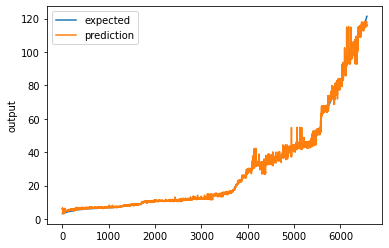

Score (RMSE): 1.730330228805542


Predicted:
[[ 6.220977   6.257852   6.165138   6.2500734  6.30973  ]
 [25.893547  25.83009   25.835155  25.884167  25.711843 ]
 [10.847039  10.7851515 10.8177    10.768042  10.80988  ]
 [92.73842   92.33131   92.68656   92.70383   92.547386 ]
 [42.58762   42.498505  42.475067  42.595493  42.458363 ]]
Expected:
[[ 5.6225  5.575   5.7425  5.8375  5.94  ]
 [25.685  25.5425 25.7025 26.1275 26.375 ]
 [11.055  11.185  11.2375 11.2325 11.23  ]
 [89.2    85.04   86.86   85.8    84.3   ]
 [43.08   42.71   42.765  43.3    44.1   ]]


In [ ]:
graphplot.regression_performance_metrics(y_test,pred,"LSTM- Additional feature", parameters)
graphplot.chart_regression(pred.flatten(),y_test)

score = np.sqrt(metrics.mean_squared_error(pred, y_test))

print("Score (RMSE): {}".format(score))
print()
print()

print("Predicted:")
print(np.array(pred[0:5]))

print("Expected:")
print(np.array(y_test[0:5]))